
Centers of clusters:
 [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]

Number of clusters in input data = 5


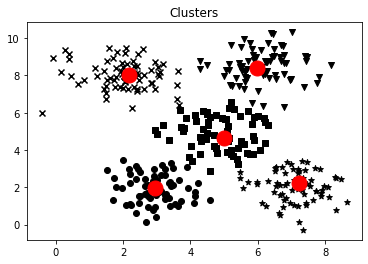

In [2]:
#Non-parametric algorithm to determine number of clusters

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle


X = np.loadtxt('data_clustering.txt', delimiter = ',')

#bandwidth = radius from cluster center
#Higher bandwidth may lead to overfitting, while lower bandwidth may increase clusters
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples = len(X))
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding = True)
meanshift_model.fit(X)

#determine cluster centers
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)

labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)

#plot
plt.figure()
markers='o*xvs'
for i, marker in zip(range(num_clusters), markers):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, facecolor='black', edgecolor = 'black')
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker = 'o', markerfacecolor='red', markeredgecolor='red', markersize = 15)

plt.title('Clusters')
plt.show()